# 训练LightGBM模型

In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.metrics import roc_auc_score,classification_report
ZHFONT = matplotlib.font_manager.FontProperties(fname="data/SourceHanSansSC-Regular.otf")

df_train = pd.read_csv("data/train_new_2.csv")

## 划分数据集

In [2]:
# 划分数据集
targets = df_train.pop('target')

train_data, val_data, train_targets, val_targets = train_test_split(df_train, targets, test_size = 0.2)

In [3]:
# 将数据集转换为LightGBM支持的格式
train_set = lgb.Dataset(train_data, label=train_targets)
val_set = lgb.Dataset(val_data, label=val_targets)

## 训练模型

In [10]:
# 设置模型超参数
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': 0.05,
    'num_leaves': 256,
    'colsample_bytree':0.7,
    'subsample':0.7,
    'num_boost_round':3100,
    'early_stopping_rounds': 10,
}

# 定义训练过程的回调函数
train_losses = []
def record_eval(env):
    train_losses.append(env.evaluation_result_list[0][2])

evals_result = {}
bst = lgb.train(params, train_set, valid_sets=[val_set],callbacks=[record_eval])

/root/miniconda3/envs/bi/lib/python3.13/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 1484044, number of negative: 1466295
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.249883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17763
[LightGBM] [Info] Number of data points in the train set: 2950339, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503008 -> initscore=0.012032
[LightGBM] [Info] Start training from score 0.012032
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[3100]	valid_0's binary_logloss: 0.497608


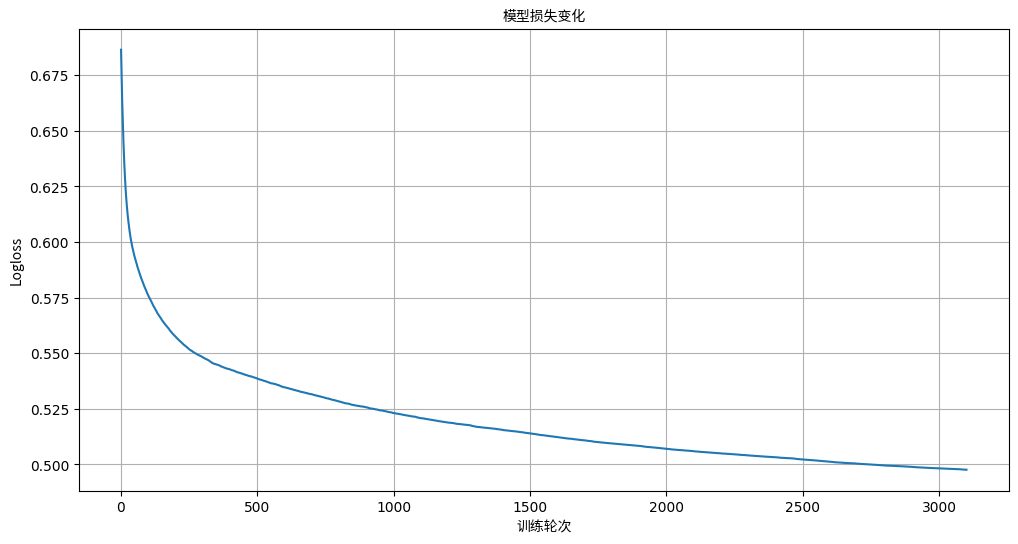

In [12]:
# 可视化训练过程中的loss
# 获取logloss
loss_result = train_losses
# 绘制损失折线图
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(loss_result) + 1), loss_result)
plt.title('模型损失变化',fontproperties=ZHFONT)
plt.xlabel('训练轮次',fontproperties=ZHFONT)
plt.ylabel('Logloss',fontproperties=ZHFONT)
plt.grid()
plt.show()

In [13]:
# 在val数据集上模型评估
pred = bst.predict(val_data)
predicted_classes = [1 if i > 0.5 else 0 for i in pred]

# 计算准确率
accuracy = classification_report(val_targets, predicted_classes)
print(accuracy)
# 计算AUC分数
auc = roc_auc_score(val_targets, predicted_classes)
print(f'AUC: {auc:.2f}')

              precision    recall  f1-score   support

           0       0.75      0.78      0.76    366124
           1       0.77      0.74      0.76    371461

    accuracy                           0.76    737585
   macro avg       0.76      0.76      0.76    737585
weighted avg       0.76      0.76      0.76    737585

AUC: 0.76
